In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join, Column
import re
from tqdm.notebook import tqdm
from scikitplot.metrics import plot_confusion_matrix
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
IB_filters = [
    ('TU_FNU_VIS', 'euclid/VIS_MEAN'),
    ('TU_FNU_Y_NISP', 'euclid/Y_MEAN'),
    ('TU_FNU_H_NISP', 'euclid/H_MEAN'),
    ('TU_FNU_J_NISP', 'euclid/J_MEAN'),
    ('TU_FNU_G_LSST', 'lsst/g_MEAN'),
    ('TU_FNU_R_LSST', 'lsst/r_MEAN'),
    ('TU_FNU_I_LSST', 'lsst/i_MEAN'),
    ('TU_FNU_Z_LSST', 'lsst/z_MEAN'),
    ('TU_FNU_IB427_SUBARU', 'Subaru/IB427_MEAN'),
    ('TU_FNU_IB464_SUBARU', 'Subaru/IB464_MEAN'),
    ('TU_FNU_IB484_SUBARU', 'Subaru/IB484_MEAN'),
    ('TU_FNU_IB505_SUBARU', 'Subaru/IB505_MEAN'),
    ('TU_FNU_IB527_SUBARU', 'Subaru/IB527_MEAN'),
    ('TU_FNU_IB574_SUBARU', 'Subaru/IB574_MEAN'),
    ('TU_FNU_IB624_SUBARU', 'Subaru/IB624_MEAN'),
    ('TU_FNU_IB679_SUBARU', 'Subaru/IB679_MEAN'),
    ('TU_FNU_IB709_SUBARU', 'Subaru/IB709_MEAN'),
    ('TU_FNU_IB738_SUBARU', 'Subaru/IB738_MEAN'),
    ('TU_FNU_IB767_SUBARU', 'Subaru/IB767_MEAN'),
    ('TU_FNU_IB827_SUBARU', 'Subaru/IB827_MEAN'),
]

In [3]:
true_photo = Table.read('/home/aalvarez/Work/Data/SC8/TU/Stars/Wide/Healpix/IB_2740.fits', hdu=1)
true_photo.rename_column('SOURCE_ID', 'OBJECT_ID')

In [4]:
def plot_bands(catalog):
    ncols = 2
    nrows = len(IB_filters) // 2

    fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=(20, 20))
    for (tu_f, mean_f), ax in zip(IB_filters, axes.ravel()):
        g0 = catalog[tu_f] > 0
        
        ax.set_title(mean_f)
        ratio = (catalog[mean_f] / (catalog[tu_f]*1e6))
              
        good = catalog['FLAGS_1'] == 0
        mean_all = np.mean(ratio)
        std_all = np.std(ratio)
        mean_good = np.mean(ratio[good])
        std_good = np.std(ratio[good])
                
        ax.scatter(catalog[tu_f][g0], ratio[g0], marker='1', alpha=0.4,
                   label=f'All {len(catalog)} ($\mu$ {mean_all:.2f}, $\sigma$ {std_all:.2f})')
        ax.scatter(catalog[tu_f][good & g0], ratio[good & g0], marker='.',
                   label=f'Not flagged {good.sum()} ($\mu$ {mean_good:.2f}, $\sigma$ {std_good:.2f})')
        ax.axhline(1, linestyle='--', color='red')
        
        ax.set_xlabel('uJy')
        ax.set_ylabel('$\\dfrac{F_\mu}{F}$')
        ax.set_xscale('log')
        ax.set_ylim(-0.5, 2.5)

        ax.legend()
    plt.tight_layout()

In [5]:
nnpz = Table.read('/home/aalvarez/Work/star_seds.fits')

In [6]:
matched = join(true_photo, nnpz, 'OBJECT_ID')

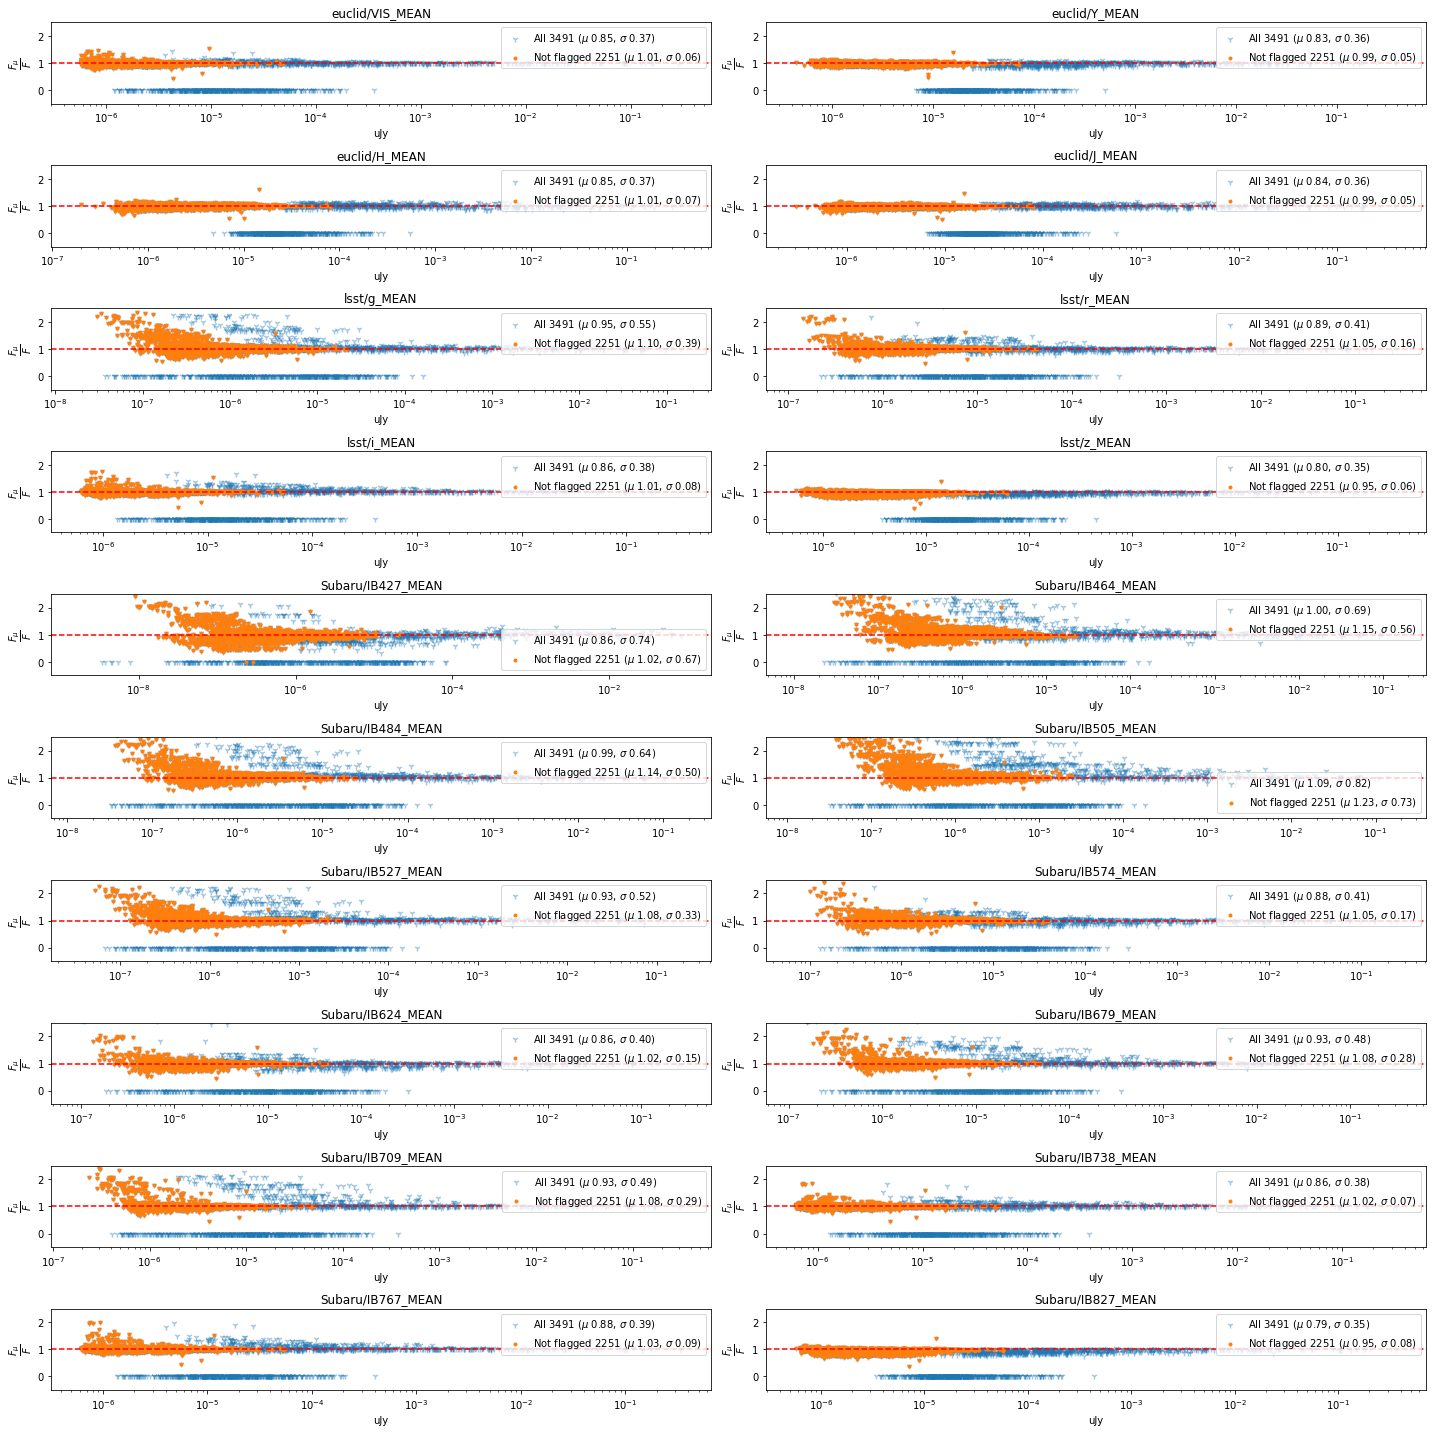

In [7]:
plot_bands(matched)

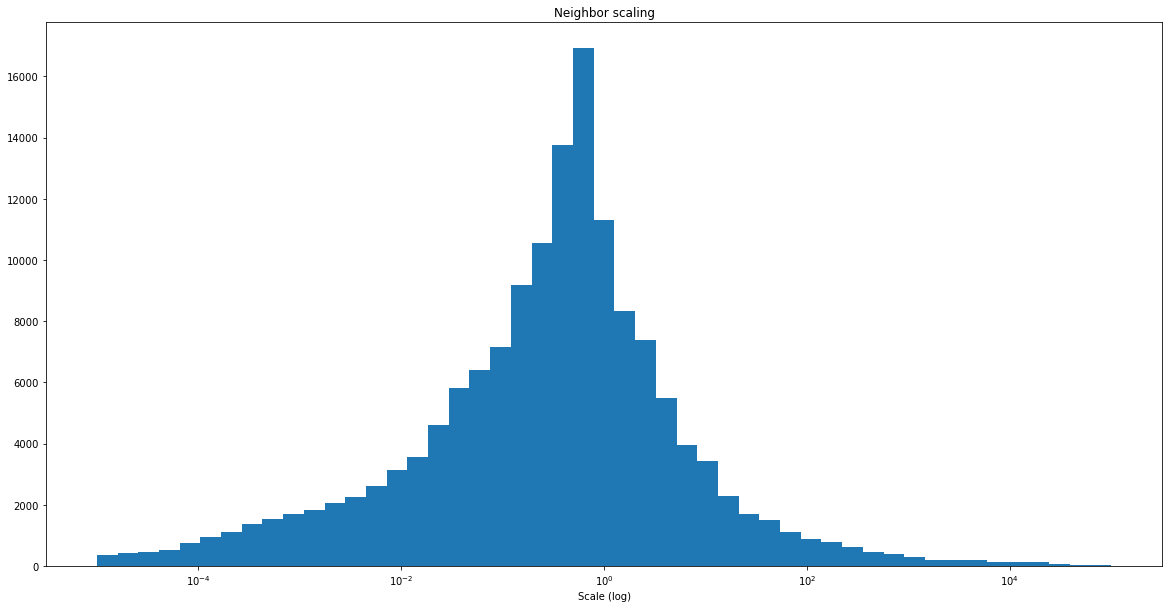

In [8]:
bins = 10**np.linspace(-5, 5)
plt.figure()
plt.title('Neighbor scaling')
plt.hist(nnpz['NEIGHBOR_SCALING'].ravel(), bins=bins)
plt.xscale('log')
plt.xlabel('Scale (log)')
plt.show()